#**DSM-I Assignment I**

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from lets_plot import *
LetsPlot.setup_html()

In [65]:
df = pd.read_csv("D:/PYTHON/DATA SCIENCE/DATA/bank-additional-full.csv",sep = ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [66]:
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

###**Aggregate conversion rate tellsthe overall performance of Marketing Campaigns**

##### 1. Break down the customer base into multiple segments according to Education  ***Hint: Use Pivot table***

In [67]:
conversions_by_education_df = pd.pivot_table(df,values ='y' , index='education', columns='conversion', aggfunc=len)
conversions_by_education_df

conversion,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [68]:
conversions_by_education_df.columns =[['conversion','nonconversion']]
conversions_by_education_df

,conversion,nonconversion
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


##### **2. To visualize, use pie-chart for each group**

In [69]:
import matplotlib.pyplot as plt

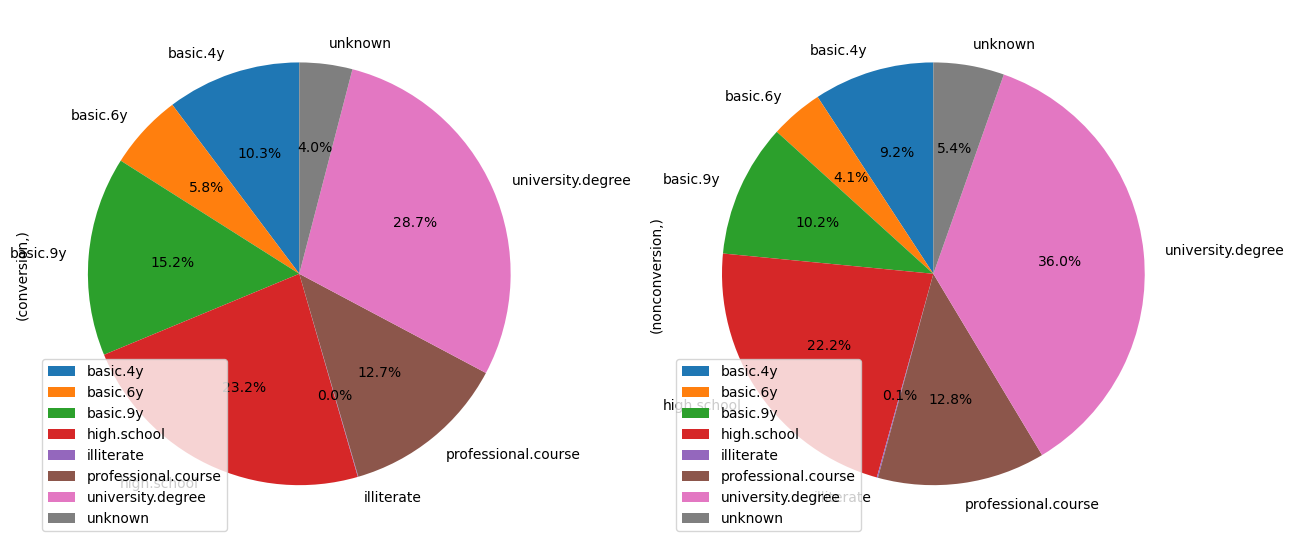

In [70]:
conversions_by_education_df.plot(
    kind='pie',
    figsize=(15,7),
    subplots=True,
    startangle=90,
    autopct='%1.1f%%'
)
plt.show()

#####**3. Break down the customer base into multiple segments according to Job  ** *Hint : Use Pivot table*

In [71]:
conversions_by_job_df =pd.pivot_table(df,values='y',index='job',columns='conversion',aggfunc=len)
conversions_by_job_df

conversion,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [72]:
conversions_by_job_df.columns =[['conversion','nonconversion']]
conversions_by_job_df

,conversion,nonconversion
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


##### **4. To visualize, use pie-chart for each group**

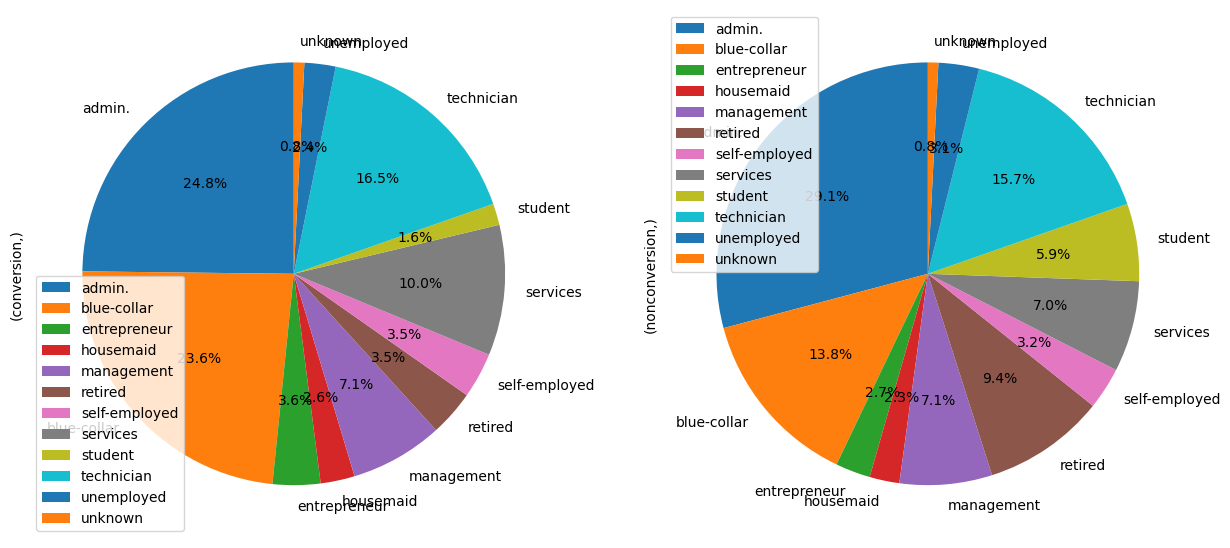

In [73]:
conversions_by_job_df.plot(
    kind='pie',
    figsize=(15,7),
    subplots=True,
    startangle=90,
    autopct='%1.1f%%'

)
plt.show()

**Load Advertising data**

In [74]:
df1 = pd.read_csv("D:/PYTHON/DATA SCIENCE/DATA\Advertising.csv", index_col = 'Date')
df1.head()

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\AJITH N\AppData\Local\Temp\ipykernel_11160\1074478030.py:1: SyntaxWarning: invalid escape sequence '\A'
  df1 = pd.read_csv("D:/PYTHON/DATA SCIENCE/DATA\Advertising.csv", index_col = 'Date')


,Products,Web,Newspaper,Radio,TV
Date,,,,,
01/01/2018,Mobile,230100,69200,37800,22100
01/02/2018,Mobile,44500,45100,39300,10400
01/03/2018,Mobile,17200,69300,45900,9300
01/04/2018,Mobile,151500,58500,41300,18500
01/05/2018,Mobile,180800,58400,10800,12900


**5. Identify the count of each product**

In [75]:
df1['Products'].unique()


array(['Mobile', 'Electronics', 'Laptops'], dtype=object)

##### **6.Display media wise product count**

In [76]:
web_sum = df1.groupby('Products')['Web'].sum()

In [77]:
newspaper_sum = df1.groupby('Products')['Newspaper'].sum()

In [78]:
radio_sum = df1.groupby('Products')['Radio'].sum()

In [79]:
tv_sum=df1.groupby('Products')['TV'].sum()

In [80]:
media = pd.concat(
    [web_sum,newspaper_sum,radio_sum,tv_sum],
    axis=1
)

In [81]:
media

,Web,Newspaper,Radio,TV
Products,,,,
Electronics,7734400,1500100,1161200,698300
Laptops,2711700,379200,374000,257800
Mobile,18962400,4231500,3117600,1848400


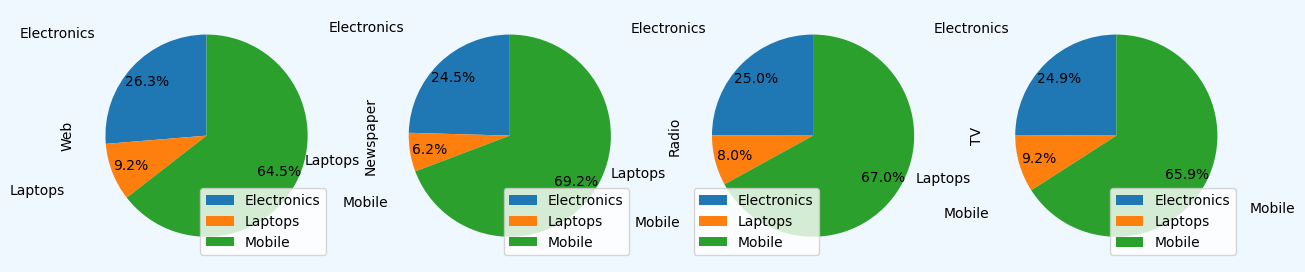

In [87]:
media.plot(
    kind='pie',
    figsize=(15,7),
    subplots=True,
    labeldistance=1.5,
    pctdistance=0.8,
    startangle=90,
    autopct='%1.1f%%'
    
)
plt.gca().set_facecolor("lightblue")
plt.gcf().set_facecolor("#f0f8ff")